In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tifffile
from pyqupath.tiff import TiffZarrReader

from pycodex.io import setup_gpu
from pycodex.segmentation import (
    run_segmentation_mesmer_cell,
    run_segmentation_mesmer_compartments,
)
from pycodex.segmentation_mask import (
    create_rgb_segmentation_mask,
    find_label_boundaries,
)

setup_gpu("1")

Using GPU(s): ['/physical_device:GPU:0']


In [2]:
unit_dir = Path("../demo/data/segmentation/reg001/")
!tree {unit_dir}

../demo/data/segmentation/reg001
└── reg001.ome.tiff

0 directories, 1 file


# 01. Whole Cell Segmentation

In [3]:
internal_markers = ["DAPI"]
boundary_markers = ["CD45", "CD3e", "CD163", "NaKATP"]
thresh_q_min = 0
thresh_q_max = 0.99
thresh_otsu = False
scale = True
pixel_size_um = 0.5068164319979996
maxima_threshold = 0.075
interior_threshold = 0.20

tag = "250530_cell"
run_segmentation_mesmer_cell(
    unit_dir=unit_dir,
    internal_markers=internal_markers,
    boundary_markers=boundary_markers,
    thresh_q_min=thresh_q_min,
    thresh_q_max=thresh_q_max,
    thresh_otsu=thresh_otsu,
    scale=scale,
    pixel_size_um=pixel_size_um,
    maxima_threshold=maxima_threshold,
    interior_threshold=interior_threshold,
    tag=tag,
)


Logging is configured. Logs are saved to: ../demo/data/segmentation/reg001/250530_cell/segmentation.log and displayed in the console.


INFO:root:OME-TIFF file loaded: None.
2025-06-01 04:41:45.862226: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-01 04:41:46.359328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22221 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:4b:00.0, compute capability: 8.6


2025-06-01 04:41:51,358 - WARNING - No training configuration found in save file, so the model was *not* compiled. Compile it manually.
2025-06-01 04:41:53.092839: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2025-06-01 04:41:53.861172: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
INFO:root:Segmentation completed.
Writing tiles: 100%|██████████| 21/21 [00:00<00:00, 213.97it/s]
INFO:root:Markers used for segmentation saved as OME-TIFF.
INFO:root:Single-cell features extracted.


In [4]:
!tree {unit_dir}

../demo/data/segmentation/reg001
├── 250530_cell
│   ├── data.csv
│   ├── dataScaleSize.csv
│   ├── parameter_segmentation.json
│   ├── segmentation.log
│   ├── segmentation_markers.ome.tiff
│   └── segmentation_mask.tiff
└── reg001.ome.tiff

1 directory, 7 files


In [5]:
segmentation_mask = tifffile.imread(unit_dir / tag / "segmentation_mask.tiff")
tiff_reader = TiffZarrReader.from_ometiff(
    unit_dir / tag / "segmentation_markers.ome.tiff"
)

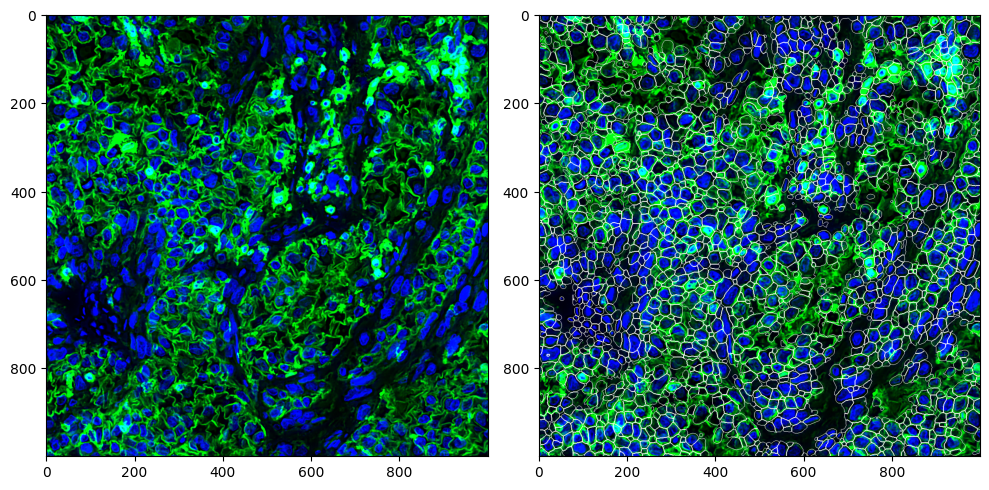

In [6]:
y_min, x_min = 0, 0
y_max, x_max = segmentation_mask.shape

internal_channel_sm = tiff_reader.zimg_dict["internal_sum"][y_min:y_max, x_min:x_max]
boundary_channel_sm = tiff_reader.zimg_dict["boundary_sum"][y_min:y_max, x_min:x_max]
segmentation_mask_sm = segmentation_mask[y_min:y_max, x_min:x_max]

rgb_image = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
)
rgb_image_outline = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
    outline=True,
    segmentation_mask=segmentation_mask_sm,
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_image)
ax[1].imshow(rgb_image_outline)
fig.tight_layout()
plt.show()

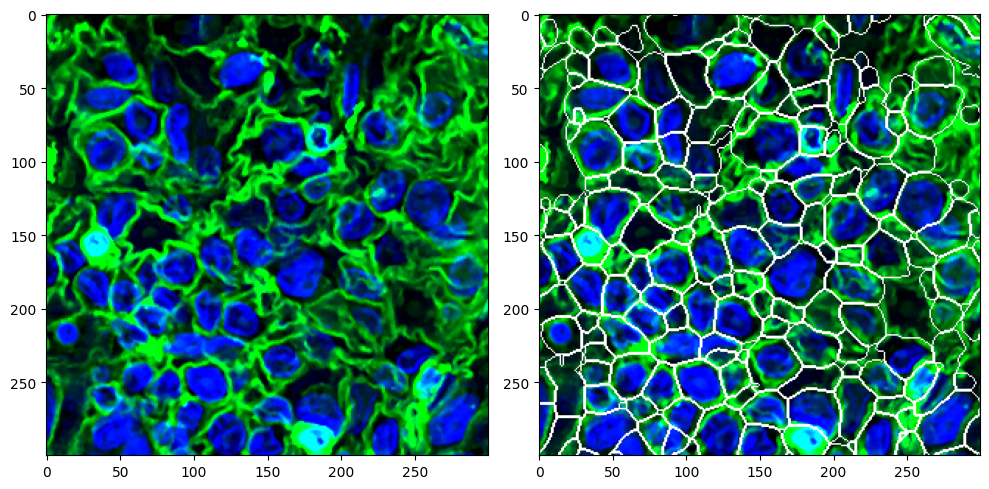

In [7]:
y_min, x_min = 200, 200
y_max, x_max = 500, 500

internal_channel_sm = tiff_reader.zimg_dict["internal_sum"][y_min:y_max, x_min:x_max]
boundary_channel_sm = tiff_reader.zimg_dict["boundary_sum"][y_min:y_max, x_min:x_max]
segmentation_mask_sm = segmentation_mask[y_min:y_max, x_min:x_max]

rgb_image = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
)
rgb_image_outline = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
    outline=True,
    segmentation_mask=segmentation_mask_sm,
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_image)
ax[1].imshow(rgb_image_outline)
fig.tight_layout()
plt.show()

# 02. Components Segmentation

In [8]:
internal_markers = ["DAPI"]
boundary_markers = ["CD45", "CD3e", "CD163", "NaKATP"]
thresh_q_min = 0
thresh_q_max = 0.99
thresh_otsu = False
scale = True
pixel_size_um = 0.5068164319979996
maxima_threshold = 0.075
interior_threshold = 0.20

tag = "250530_compartments"
run_segmentation_mesmer_compartments(
    unit_dir=unit_dir,
    internal_markers=internal_markers,
    boundary_markers=boundary_markers,
    thresh_q_min=thresh_q_min,
    thresh_q_max=thresh_q_max,
    thresh_otsu=thresh_otsu,
    scale=scale,
    pixel_size_um=pixel_size_um,
    maxima_threshold=maxima_threshold,
    interior_threshold=interior_threshold,
    tag=tag,
)

INFO:root:OME-TIFF file loaded: None.



Logging is configured. Logs are saved to: ../demo/data/segmentation/reg001/250530_compartments/segmentation.log and displayed in the console.


2025-06-01 04:42:06,947 - WARNING - No training configuration found in save file, so the model was *not* compiled. Compile it manually.
2025-06-01 04:42:06,947 - WARNING - No training configuration found in save file, so the model was *not* compiled. Compile it manually.
INFO:root:Segmentation completed.
Writing tiles: 100%|██████████| 21/21 [00:00<00:00, 212.27it/s]
INFO:root:Markers used for segmentation saved as OME-TIFF.
INFO:root:Single-cell features extracted.


In [9]:
!tree {unit_dir}

../demo/data/segmentation/reg001
├── 250530_cell
│   ├── data.csv
│   ├── dataScaleSize.csv
│   ├── parameter_segmentation.json
│   ├── segmentation.log
│   ├── segmentation_markers.ome.tiff
│   └── segmentation_mask.tiff
├── 250530_compartments
│   ├── cell_data.csv
│   ├── cell_dataScaleSize.csv
│   ├── membrane_data.csv
│   ├── membrane_dataScaleSize.csv
│   ├── nuclear_data.csv
│   ├── nuclear_dataScaleSize.csv
│   ├── parameter_segmentation.json
│   ├── segmentation.log
│   ├── segmentation_markers.ome.tiff
│   ├── segmentation_mask_cell.tiff
│   ├── segmentation_mask_membrane.tiff
│   └── segmentation_mask_nuclear.tiff
└── reg001.ome.tiff

2 directories, 19 files


In [10]:
segmentation_mask_cell = tifffile.imread(unit_dir / tag / "segmentation_mask_cell.tiff")
segmentation_mask_nuclear = tifffile.imread(
    unit_dir / tag / "segmentation_mask_nuclear.tiff"
)
segmentation_mask_membrane = tifffile.imread(
    unit_dir / tag / "segmentation_mask_membrane.tiff"
)
tiff_reader = TiffZarrReader.from_ometiff(
    unit_dir / tag / "segmentation_markers.ome.tiff"
)

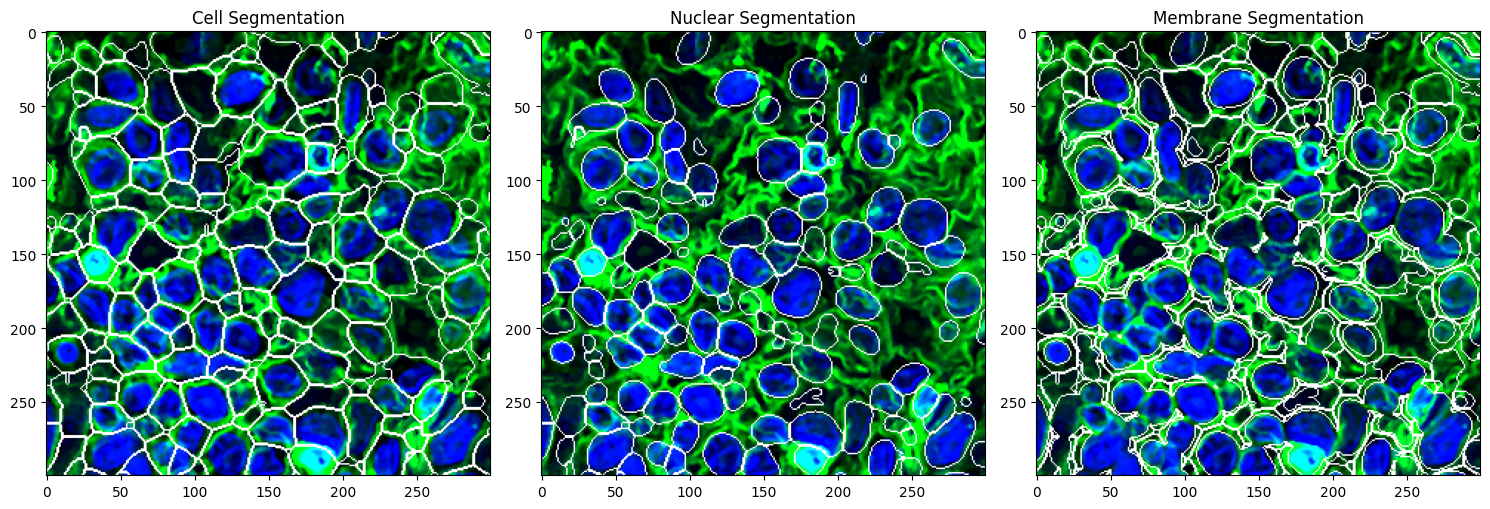

In [11]:
y_min, x_min = 200, 200
y_max, x_max = 500, 500

internal_channel_sm = tiff_reader.zimg_dict["internal_sum"][y_min:y_max, x_min:x_max]
boundary_channel_sm = tiff_reader.zimg_dict["boundary_sum"][y_min:y_max, x_min:x_max]
segmentation_mask_cell_sm = segmentation_mask_cell[y_min:y_max, x_min:x_max]
segmentation_mask_nuclear_sm = segmentation_mask_nuclear[y_min:y_max, x_min:x_max]
segmentation_mask_membrane_sm = segmentation_mask_membrane[y_min:y_max, x_min:x_max]

rgb_cell = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
    outline=True,
    segmentation_mask=segmentation_mask_cell_sm,
)
rgb_nuclear = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
    outline=True,
    segmentation_mask=segmentation_mask_nuclear_sm,
)
rgb_membrane = create_rgb_segmentation_mask(
    internal_channel_sm,
    boundary_channel_sm,
    outline=True,
    segmentation_mask=segmentation_mask_membrane_sm,
)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(rgb_cell)
ax[0].set_title("Cell Segmentation")
ax[1].imshow(rgb_nuclear)
ax[1].set_title("Nuclear Segmentation")
ax[2].imshow(rgb_membrane)
ax[2].set_title("Membrane Segmentation")
fig.tight_layout()
plt.show()


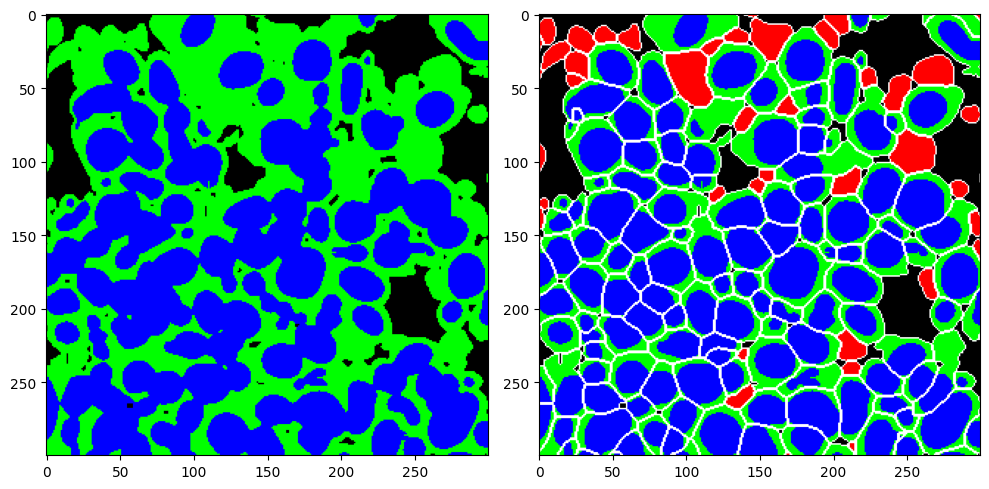

In [12]:
labels_both = [
    label
    for label in np.unique(segmentation_mask_cell_sm)
    if label in np.unique(segmentation_mask_nuclear_sm)
]
boundaries = find_label_boundaries(segmentation_mask_cell_sm)

rgb_image = np.zeros(
    (segmentation_mask_cell_sm.shape[0], segmentation_mask_cell_sm.shape[1], 3),
    dtype=np.uint8,
)
# Green for membrane, and blue for nuclear
rgb_image[segmentation_mask_membrane_sm.astype(bool)] = (0, 255, 0)
rgb_image[segmentation_mask_nuclear_sm.astype(bool)] = (0, 0, 255)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rgb_image)
# Red for cells without nuclear segmentation
rgb_image[np.isin(segmentation_mask_cell_sm, labels_both, invert=True)] = (255, 0, 0)
rgb_image[boundaries.astype(bool)] = (255, 255, 255)
axes[1].imshow(rgb_image)
fig.tight_layout()
plt.show()